In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import cifar10

In [3]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

In [4]:
x_train.shape

(50000, 32, 32, 3)

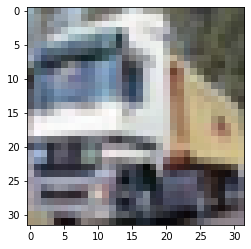

In [5]:
plt.imshow(x_train[1])

In [6]:
x_train = x_train/255
x_test = x_test/255

In [7]:
x_test.shape

(10000, 32, 32, 3)

In [8]:
from tensorflow.keras.utils import to_categorical

In [9]:
y_train_cat = to_categorical(y_train,10)

In [10]:
y_test_cat = to_categorical(y_test,10)

In [11]:
from tensorflow.keras.models import Sequential

In [12]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [13]:
model = Sequential()

model.add(Conv2D(filters = 32,
                kernel_size = (4,4),
                input_shape = (32,32,3),
                activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(filters = 32,
                kernel_size = (4,4),
                input_shape = (32,32,3),
                activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Flatten())

model.add(Dense(256,activation = 'relu'))

model.add(Dense(10,activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy',optimizer = 'adam',
              mertic = 'accuracy'
             )

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               205056    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2

In [15]:
from tensorflow.keras.callbacks import EarlyStopping

In [16]:
early = EarlyStopping(monitor = 'val_loss',patience = 2)

In [17]:
model.fit(x_train,y_train_cat,epochs = 15,
         validation_data = (x_test,y_test_cat),
         callbacks = [early])

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 44s 886us/sample - loss: 1.4660 - val_loss: 1.2294
Epoch 2/15
50000/50000 [==============================] - 42s 843us/sample - loss: 1.1381 - val_loss: 1.1260
Epoch 3/15
50000/50000 [==============================] - 44s 870us/sample - loss: 0.9831 - val_loss: 1.0251
Epoch 4/15
50000/50000 [==============================] - 48s 962us/sample - loss: 0.8741 - val_loss: 0.9933
Epoch 5/15
50000/50000 [==============================] - 51s 1ms/sample - loss: 0.7792 - val_loss: 0.9560
Epoch 6/15
50000/50000 [==============================] - 50s 1000us/sample - loss: 0.6963 - val_loss: 0.9684
Epoch 7/15
50000/50000 [==============================] - 46s 912us/sample - loss: 0.6191 - val_loss: 1.0031


In [18]:
metric = pd.DataFrame(model.history.history)

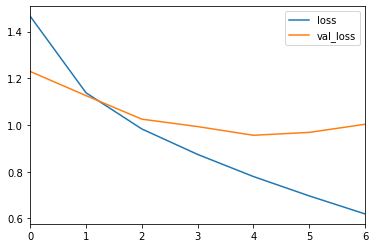

In [20]:
metric.plot()

In [21]:
model.evaluate(x_test,y_test_cat,verbose = 0)

1.003059849357605

In [22]:
from sklearn.metrics import classification_report,confusion_matrix

In [27]:
pred = model.predict_classes(x_test)

In [29]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.67      0.76      0.71      1000
           1       0.82      0.77      0.79      1000
           2       0.55      0.60      0.57      1000
           3       0.54      0.42      0.47      1000
           4       0.65      0.59      0.62      1000
           5       0.55      0.59      0.57      1000
           6       0.74      0.79      0.76      1000
           7       0.71      0.76      0.73      1000
           8       0.78      0.76      0.77      1000
           9       0.77      0.74      0.75      1000

    accuracy                           0.68     10000
   macro avg       0.68      0.68      0.68     10000
weighted avg       0.68      0.68      0.68     10000



In [30]:
test_image = x_test[9]

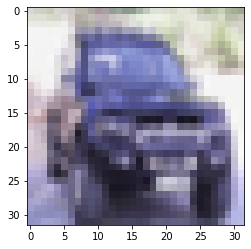

In [31]:
plt.imshow(test_image)

In [34]:
predicted = model.predict_classes(test_image.reshape(1,32,32,3))

In [35]:
predicted

array([1], dtype=int64)